# Flows with heat transfer (Rayleigh flows)

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
from scipy.optimize import root_scalar

# Pint gives us some helpful unit conversion
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity # We will use this to construct quantities (value + unit)

In [5]:
# these lines are only for helping improve the display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'png')
plt.rcParams['figure.dpi']= 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['mathtext.fontset'] = 'cm'

Heat transfer is the third main factor that can affect a compressible flow, after area change and friction.

**Rayleigh flow** is the specific case of frictionless flow in a constant-area duct, with heat transfer. Rayleigh flow applies to constant-area heat exchangers and combustion chambers where the entropy changes due to heat transfer are significantly larger than those due to friction:

$$
d s_e \gg d s_i \;,
$$

so we can neglect frictional effects and say $ ds \approx ds_e $.

## Rayleigh flow theory

:::{figure-md} fig-rayleigh-cv
<img src="../images/rayleigh-flow-control-volume.*" alt="Control volume for Rayleigh flow" class="bg-white mb-1" width="400px">

Differential control volume for frictionless flow in a constant-area duct with heat transfer.
:::

{numref}`Figure {number}<fig-rayleigh-cv>` shows a control volume in a constant-area duct, where the flow starts out with velocity $V$, density $\rho$, and pressure $p$. 
A small amount of heat $\delta q$ is added to the flow. 
The width of the differential control volume is $dx$ and the cross-sectional area of the duct is $A$.

For a general fluid, we can apply conservation of mass:

\begin{gather*}
\rho V = (\rho + d\rho) (V + dV)
\rightarrow \rho V = G = \text{constant} \;.
\end{gather*}

Applying conservation of momentum gives

\begin{gather*}
\sum F_x = \dot{m} \left( V_{\text{out}, x} - V_{\text{in}, x} \right) \\
pA - (p + dp) A = (\rho A V) \left[ (V + dV) - V \right] \\
- A dp = \rho A V dV \\
dp + \rho V dV = 0 \;,
\end{gather*}

which we can integrate through the flow (since $\rho V = $ constant) to get

$$
p + \rho V^2 = \text{constant}
$$ (eq_rayleigh_momentum)


Next, applying conservation of energy:

\begin{gather*}
\delta q - \delta w_s = \left[ (h+dh) + \frac{(V+dV)^2}{2} \right] - \left( h + \frac{V^2}{2} \right) \\
\delta q = dh + V dV \;.
\end{gather*}

For an ideal gas, where $ dh = c_p dT $, we can express the above as

$$
\delta q = c_p dT + V dV \;.
$$

Recall the definitions of stagnation enthalpy and temperature:

$$
h_t = c_p T_t = h + \frac{V^2}{2} = c_p T + \frac{V^2}{2} \;.
$$

If we differentiate, we get

$$
d h_t = c_p d T_t = c_p T + V dV
$$

and see that

$$
\delta q = d h_t = c_p d T_t \;.
$$

We can see that stagnation enthlapy is **not constant**.

```{warning}
Up to this point, we have been able to rely on the fact that stagnation enthalpy and stagnation temperature are constant. However, this is not the case in Rayleigh flows due to heat transfer.
```

We can use these relationships to develop a $T$–$s$ or $h$–$s$ diagram of a **Rayleigh line**, based on the property relationship

\begin{gather*}
T ds = dh - v dp \\
ds = c_p \frac{dT}{T} - R \frac{dp}{p} \;,
\end{gather*}

which we can integrate from some reference state 1 to some general state:

$$
\frac{s-s_1}{c_p} = \log \frac{T}{T_1} - \frac{\gamma-1}{\gamma} \log \frac{p}{p_1} \;.
$$ (eq_entropy_difference_initial)

To express the entropy difference $ (s - s_1)/c_p $ only in terms of relative temperature $ T / T_1 $ and the reference Mach number $ M_1 $ we need to do a bit of work, but we can obtain

$$
\frac{s - s_1}{c_p} = \log \frac{T}{T_1} - \frac{\gamma - 1}{\gamma} \log \left[ \frac{(1 + \gamma M_1^2) \pm \sqrt{ \left(1 + \gamma M_1^2 \right)^2 - 4 \gamma M_1^2 (T/T_1)}}{2} \right] \;,
$$ (eq_entropy_rayleigh)

where the $+$ sign in the equation is used for the upper branch of the Rayleigh line to the point of maximum temperature, and the $-$ sign in the equation is used for the lower part of the curve.
Given a reference Mach number $M_1$ and specific heat ratio $\gamma$, we can use Equation {eq}`eq_entropy_rayleigh` to compute a Rayleigh line on a $T$–$s$ diagram, using relative temperature $T / T_1$ and entropy $ (s - s_1)/c_p $.

:::{admonition} Detailed derivation
:class: tip, dropdown

Recall from Equation {eq}`eq_rayleigh_momentum` we have that $p + \rho V^2 = $ constant.
We can express this in terms of Mach number using the speed of sound definition ($ a^2 = \gamma R T $):

\begin{gather*}
p + \rho V^2 = \text{constant} \\
p \left(1 +  \frac{V^2}{RT} \right) = \text{constant}
\end{gather*}

$$
p \left(1 + \gamma M^2 \right) = \text{constant}
$$ (eq_pressure_constant)

$$
\therefore \frac{p}{p_1} = \frac{1 + \gamma M_1^2}{1 + \gamma M^2}
$$ (eq_pressure_mach_relationship)

We can express the Mach number at any point in the flow based on the pressure ratio by rearranging that equation:

$$
M^2 = \frac{1}{\gamma} \left[ \frac{p_1}{p} \left( 1 + \gamma M_1^2 \right) - 1 \right] \;.
$$ (eq_mach_pressure_ratio)

From the ideal gas equation of state, and conservation of mass, we can express temperature at any point in the flow with

\begin{gather*}
T = \frac{p}{\rho R} = \frac{p A M \sqrt{\gamma R T}}{\dot{m} R} \\
\sqrt{T} = \frac{A \sqrt{\gamma R}}{\dot{m} R} p M = (\text{constant}) p M \\
T = (\text{constant}) p^2 M^2 \;,
\end{gather*}

which we can combine with Equation {eq}`eq_pressure_constant` (note that the constants are not the same but can be combined into a new constant) to get

\begin{gather*}
T = (\text{constant}) \frac{M^2}{\left( 1 + \gamma M^2 \right)^2} \\
\rightarrow T \frac{\left( 1 + \gamma M^2 \right)^2}{M^2} = (\text{constant}) \\
T \frac{\left( 1 + \gamma M^2 \right)^2}{M^2} = T_1 \frac{\left( 1 + \gamma M_1^2 \right)^2}{M_1^2}
\end{gather*}

$$
\frac{T}{T_1} = \frac{M^2}{M_1^2} \frac{\left( 1 + \gamma M_1^2 \right)^2}{\left( 1 + \gamma M^2 \right)^2}
$$ (eq_rayleigh_temperature_ratio_reference)

Rearranging this, we get

$$
\frac{T}{T_1} \frac{M_1^2}{M^2} = \frac{\left( 1 + \gamma M_1^2 \right)^2}{\left( 1 + \gamma M^2 \right)^2}
$$

Combine this with Equations {eq}`eq_pressure_mach_relationship` and {eq}`eq_mach_pressure_ratio`:

\begin{gather*}
\frac{p}{p_1} = \frac{\left( 1 + \gamma M_1^2 \right)^2}{\left( 1 + \gamma M^2 \right)^2} = \sqrt{\frac{T}{T_1}} \frac{M_1}{M} \\
\frac{p}{p_1} M = M_1 \sqrt{\frac{T}{T_1}} \\
\frac{p}{p_1} \sqrt{\frac{1}{\gamma} \left[ \frac{p_1}{p} \left( 1 + \gamma M_1^2 \right) - 1 \right]} = M_1 \sqrt{\frac{T}{T_1}} \\
\left( \frac{p}{p_1} \right)^2 \left( \frac{1}{\gamma} \right) \left[ \frac{p_1}{p} \left( 1 + \gamma M_1^2 \right) - 1 \right] = M_1^2 \frac{T}{T_1} \\
\rightarrow \left( \frac{p}{p_1} \right)^2 - \left( 1 + \gamma M_1^2 \right) \left( \frac{p}{p_1} \right) + \gamma M_1^2 \frac{T}{T_1} \;,
\end{gather*}

which is a quadratic equation. We can solve for $ p / p_1 $:

$$
\frac{p}{p_1} = \frac{1 + \gamma M_1^2}{2} \pm \frac{\sqrt{(1 + \gamma M_1^2)^2 - 4 \gamma M_1^2 (T/T_1)}}{2} \;,
$$

which can be subtituted into Equation {eq}`eq_entropy_difference_initial` to obtain Equation {eq}`eq_entropy_rayleigh`. Whew!

:::

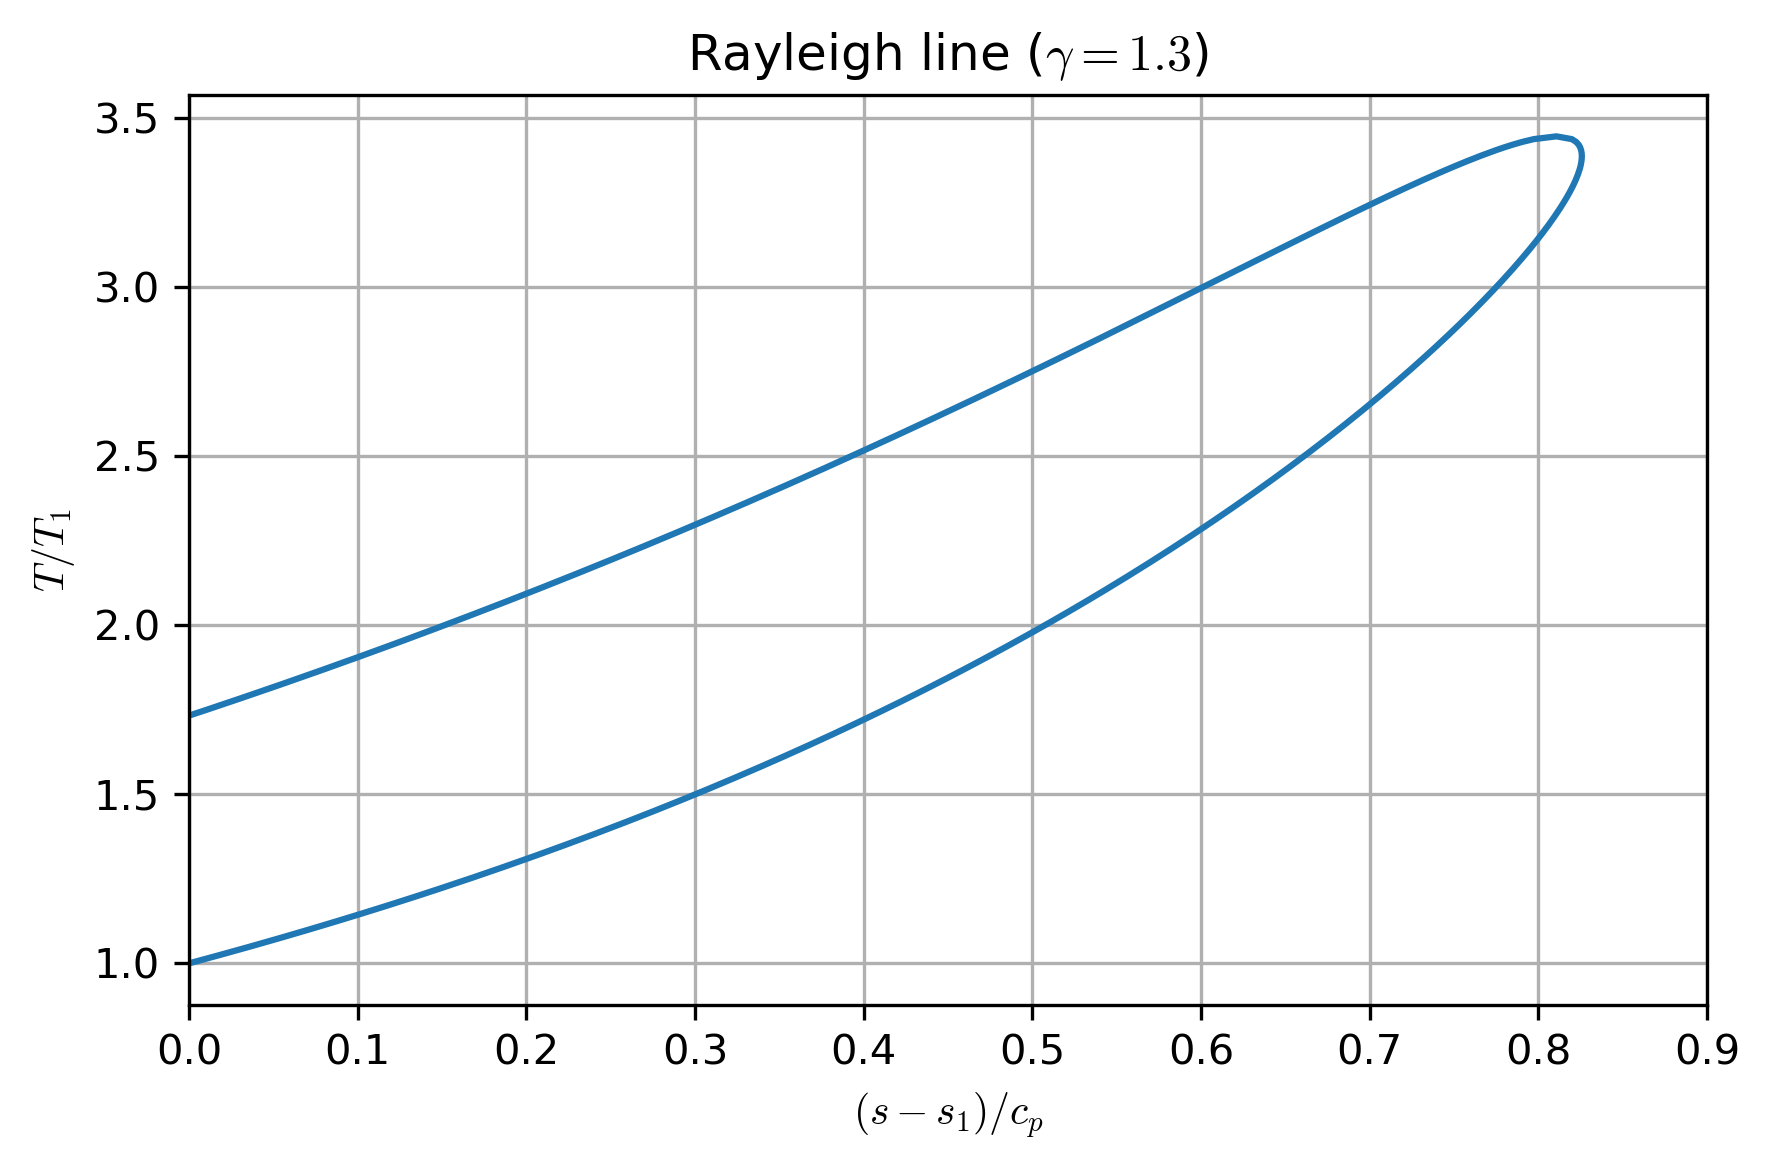

In [6]:
gamma = 1.3
M1 = 3.0
Tt_T1 = 1 + 0.5*(gamma-1)*M1**2

max_temp_ratio = (1+gamma*M1**2)**2 / (4*gamma*M1**2)

T_T1 = np.linspace(1.0, max_temp_ratio, 300)
delta_s_cp_upper = (
    np.log(T_T1) - (gamma-1)*np.log(
        (1+gamma*M1**2 + np.sqrt((1+gamma*M1**2)**2 - 4*gamma*T_T1*M1**2))/2
        ) / gamma
    )
delta_s_cp_lower = (
    np.log(T_T1) - (gamma-1)*np.log(
        (1+gamma*M1**2 - np.sqrt((1+gamma*M1**2)**2 - 4*gamma*T_T1*M1**2))/2
        ) / gamma
    )

fig, ax = plt.subplots()

ax.plot(
    np.hstack((delta_s_cp_lower, delta_s_cp_upper[::-1])),
    np.hstack((T_T1, T_T1[::-1]))
    )
ax.set_title(r'Rayleigh line ($\gamma = 1.3$)')
ax.set_xlabel(r'$(s - s_1) / c_p$')
ax.set_ylabel(r'$T / T_1$')
ax.set_xlim([0, 0.9])
ax.grid(True)
#plt.savefig('rayleigh-line.png')
plt.tight_layout()
plt.show()
#plt.close()

As with Fanno flows, we see that there is a limiting point of maximum entropy.
However, *unlike* with Fanno flows, we can move both to the left and right along a Rayleigh line, because heat can be added or removed. Adding heat means positive entropy and moving towards the limiting point, and removing heat means entropy decreases and moving away from the limiting point.

Identifying the state associated with this limiting point follows a similar procedure as with Fanno flows.
From conservation of mass, we have $ G = \rho V = $ constant. From conservation of momentum given by Equation {eq}`eq_rayleigh_momentum`, we have

\begin{gather*}
p + \rho V^2 = \frac{G^2}{\rho} = \text{constant} \\
dp + G^2 \left(- \frac{d\rho}{\rho^2} \right) = 0 \\
\frac{dp}{d\rho} = \frac{G^2}{\rho^2} = V^2 \\
\end{gather*}

This relationship applies to any fluid, between two differentially separated states on a Rayleigh line.
If we apply this at two points right around the limiting point of maximum entropy, then entropy is constant and $ ds = 0 $:

\begin{gather*}
V^2 = \left( \frac{dp}{d\rho} \right)_{\text{limiting point}} = \left( \frac{\partial p}{\partial \rho} \right)_{s} \\
\therefore V^2 = a^2
\end{gather*}

and the velocity is sonic at the limiting point.

```{admonition} Rayleigh flow
:class: tip

The upper branch of a Rayleigh line corresponds to **subsonic** flow, and the lower branch corresponds to **supersonic** flow. Adding heat moves a flow towards a Mach number of one, and removing heat moves a flow away from a Mach number of one.
```

## Working relations for Rayleigh flows

Based on the analysis above, we can establish working relations for properties in a Rayleigh flow as a function of Mach number.

### Static properties

From conservation of mometum, we already have an expression for pressure given by Equation {eq}`eq_pressure_constant`, which we can express between two points as

$$
\frac{p_2}{p_1} = \frac{1 + \gamma M_1^2}{1 + \gamma M_2^2} \;.
$$ (eq_rayleigh_pressure)

We also already developed a relationship between temperature at two points in the flow in Equation {eq}`eq_rayleigh_temperature_ratio_reference`, which we can express in general as

$$
\frac{T_2}{T_1} = \frac{M_2^2}{M_1^2} \left( \frac{1 + \gamma M_1^2}{1 + \gamma M_2^2} \right)^2
$$ (eq_rayleigh_temperature)

To get a relationship for density, we can use conservation of mass and the speed of sound for an ideal gas:

\begin{gather*}
\rho_1 V_1 = \rho_2 V_2 \\
\frac{\rho_2}{\rho_1} = \frac{V_1}{V_2} = \frac{M_1 \sqrt{\gamma R T_1}}{M_2 \sqrt{\gamma R T_2}} = \frac{M_1}{M_2} \sqrt{\frac{T_1}{T_2}}
\end{gather*}

and then substitute Equation {eq}`eq_rayleigh_temperature` to get

$$
\frac{\rho_2}{\rho_1} = \frac{M_1^2}{M_2^2} \left( \frac{ 1 + \gamma M_2^2}{1 + \gamma M_2^2 } \right) \;.
$$ (eq_rayleigh_density)

### Stagnation properties

We know that the stagnation temperature does not remain constant in a Rayleigh flow, so we need an expression for stagnation temperature ratio. Using the definition of stagnation temperature

$$
T_t = T \left( 1 + \frac{\gamma - 1}{2} M^2 \right) \;,
$$

we can write this for locations 1 and 2 and take the ratio to get

$$
\frac{T_{t2}}{T_{t1}} = \frac{T_2}{T_1} \left( \frac{1 + \frac{\gamma-1}{2} M_2^2}{1 + \frac{\gamma-1}{2} M_1^2} \right) \;,
$$

which we can combine with the static temperature ratio given by Equation {eq}`eq_rayleigh_temperature` to get

$$
\frac{T_{t2}}{T_{t1}} = \frac{M_2^2}{M_1^2} \left( \frac{1 + \gamma M_1^2}{1 + \gamma M_2^2} \right)^2 \left( \frac{1 + \frac{\gamma-1}{2} M_2^2}{1 + \frac{\gamma-1}{2} M_1^2} \right) \;.
$$ (eq_rayleigh_stag_temperature)

Similarly, we can get the stagnation pressure ratio by taking the definition of stagnation pressure

$$
p_t = p \left( 1 + \frac{\gamma-1}{2} M^2 \right)^{\gamma/(\gamma-1)}
$$

and taking the ratio between two locations:

$$
\frac{p_{t2}}{p_{t1}} = \frac{p_2}{p_1} \left( \frac{1 + \frac{\gamma-1}{2} M_2^2}{1 + \frac{\gamma-1}{2} M_1^2} \right)^{\gamma / (\gamma - 1)} \;.
$$

Then, substitute the static pressure ratio in Equation {eq}`eq_rayleigh_pressure`:

$$
\frac{p_{t2}}{p_{t1}} = \frac{1 + \gamma M_1^2}{1 + \gamma M_2^2} \left( \frac{1 + \frac{\gamma-1}{2} M_2^2}{1 + \frac{\gamma-1}{2} M_1^2} \right)^{\gamma / (\gamma - 1)} \;.
$$ (eq_rayleigh_stag_pressure)

We can write functions to evaluate these property ratios:

In [7]:
def get_rayleigh_pressure_ratio(mach_1, mach_2, gamma=1.4):
    '''Return p2/p1 for Rayleigh flow'''
    return ((1 + gamma*mach_1**2) / (1 + gamma*mach_2**2))

def get_rayleigh_temperature_ratio(mach_1, mach_2, gamma=1.4):
    '''Return T2/T1 for Rayleigh flow'''
    return (
        ((1 + gamma*mach_1**2) / (1 + gamma*mach_2**2))**2 *
        (mach_2**2 / mach_1**2)
        )
            
def get_rayleigh_density_ratio(mach_1, mach_2, gamma=1.4):
    '''Return rho2/rho1 for Rayleigh flow'''
    return (
        ((1 + gamma*mach_2**2) / (1 + gamma*mach_1**2)) *
        (mach_1**2 / mach_2**2)
        )
            
def get_rayleigh_stag_temperature_ratio(mach_1, mach_2, gamma=1.4):
    '''Return Tt2/Tt1 for Rayleigh flow'''
    return (
        ((1 + gamma*mach_1**2) / (1 + gamma*mach_2**2))**2 * 
            (mach_2 / mach_1)**2 * (
            (1 + 0.5*(gamma-1)*mach_2**2) /
            (1 + 0.5*(gamma-1)*mach_1**2)
            )
        )

def get_rayleigh_stag_pressure_ratio(mach_1, mach_2, gamma=1.4):
    '''Return pt2/pt1 for Rayleigh flow'''
    return (
        ((1 + gamma*mach_1**2) / (1 + gamma*mach_2**2)) * (
            (1 + 0.5*(gamma-1)*mach_2**2) /
            (1 + 0.5*(gamma-1)*mach_1**2)
            )**(gamma / (gamma - 1))
        )

### Energy

The property relationships given by Equations {eq}`eq_rayleigh_pressure`, {eq}`eq_rayleigh_temperature`, {eq}`eq_rayleigh_density`, {eq}`eq_rayleigh_stag_temperature`, and {eq}`eq_rayleigh_stag_pressure` all require knowledge of the downstream Mach number. If we do not know those conditions, we need to find them by considering conservation of energy and the heat transfer in the flow.

If we apply conservation of energy between two locations in the flow, with some heat transfer $q$, recalling that $ h = c_p T$ and $ h_t = c_p T_t $, we get

\begin{gather*}
h_{t1} + q = h_{t2} \\
c_p T_{t1} + q = c_p T_{t2}
\end{gather*}

and thus

$$
q = c_p \left( T_{t2} - T_{t1} \right) \;.
$$ (eq_rayleigh_heat)

Given an amount of heat transfer, this relationship can be used to relate the two locations in the flow.

## Rayleigh sonic reference state

The * reference state for a Rayleigh flow is the state that would exist if the flow continued until the Mach number is 1.0, through additional heat transfer.
Since this is the limiting point on a Rayleigh line, all states in a given Rayleigh flow share the same * reference state.
This can be a useful concept to solve Rayleigh flow problems, because we can easily compute property ratios between the flow at a given location and the reference point.

If we take our property relationships and apply them between an arbitrary point in the flow system and the Rayleigh * reference state, we can get

$$
\frac{p}{p^*} = f(M, \gamma) = \frac{1 + \gamma}{1 + \gamma M^2}
$$ (eq_rayleigh_reference_pressure)

$$
\frac{T}{T^*} = f(M, \gamma) = \frac{M^2 (1 + \gamma)^2}{(1 + \gamma M^2)^2}
$$ (eq_rayleigh_reference_temperature)

$$
\frac{\rho}{\rho^*} = f(M, \gamma) = \frac{1 + \gamma M^2}{(1 + \gamma) M^2}
$$ (eq_rayleigh_reference_density)

$$
\frac{T_t}{T_t^*} = f(M, \gamma) = \frac{2(1 + \gamma) M^2}{(1 + \gamma M^2)^2} \left( 1 + \frac{\gamma-1}{2} M^2 \right)
$$ (eq_rayleigh_reference_stag_temperature)

$$
\frac{p_t}{p_t^*} = f(M, \gamma) = \frac{1 + \gamma}{1 + \gamma M^2} \left( \frac{1 + \frac{\gamma-1}{2} M^2}{(\gamma + 1)/2} \right)^{\gamma/(\gamma-1)}
$$ (eq_rayleigh_reference_stag_pressure)

In [8]:
def get_rayleigh_reference_pressure(mach, gamma=1.4):
    '''Return p/p* for Rayleigh flow'''
    return ((1 + gamma) / (1 + gamma*mach**2))

def get_rayleigh_reference_temperature(mach, gamma=1.4):
    '''Return T/T* for Rayleigh flow'''
    return (
        mach**2 * (1 + gamma)**2 / 
        (1 + gamma*mach**2)**2
        )
            
def get_rayleigh_reference_density(mach, gamma=1.4):
    '''Return rho/rho* for Rayleigh flow'''
    return ((1 + gamma*mach**2) / ((1 + gamma) * mach**2))
            
def get_rayleigh_reference_stag_temperature(mach, gamma=1.4):
    '''Return Tt/Tt* for Rayleigh flow'''
    return (
        2*(1 + gamma)*mach**2 * 
        (1 + 0.5*(gamma - 1)*mach**2) / (1 + gamma*mach**2)**2
        )

def get_rayleigh_reference_stag_pressure(mach, gamma=1.4):
    '''Return pt/pt* for Rayleigh flow'''
    return (
        (1 + gamma) * (
            (1 + 0.5*(gamma-1)*mach**2) / (0.5*(gamma+1))
            )**(gamma / (gamma - 1)) /
            (1 + gamma*mach**2)
        )

## Example: find heat transfer direction

Consider a constant-area duct with supersonic flow of air,
where at one location $ M_1 = 1.5 $ and $ p_1 = 10 $ bar, 
and at a downstream location $ M_2 = 3.0 $.
Find the pressure at location 2 and the direction of heat transfer.

We can use two different strategies to find the downstream pressure $p_2$.
Using the reference state, which is shared between the two locations, we can write

$$
p_2 = \frac{p_2}{p^*} \frac{p^*}{p_1} p_1
$$

and use the Mach numbers at each location to find the two ratios.

In [9]:
gamma = 1.4
M1 = 1.5
M2 = 3.0

p1 = Q_(10, 'bar')

p1_pstar = get_rayleigh_reference_pressure(M1, gamma)
p2_pstar = get_rayleigh_reference_pressure(M2, gamma)
p2 = p2_pstar * (1 / p1_pstar) * p1
print(f'p2 = {p2: .2f}')

p2 = 3.05 bar


Alternatively, we can use the general pressure ratio $p_2 / p_1$ to directly get $p_2$:

In [10]:
p2_p1 = get_rayleigh_pressure_ratio(M1, M2, gamma)
p2 = p2_p1 * p1
print(f'p2 = {p2: .2f}')

p2 = 3.05 bar


To find the direction of heat transfer, we can calculate the stagnation temperature ratio 
$ \frac{T_{t2}}{T_{t1}} $. We can also do this using either approach.

Using the reference state,

$$
\frac{T_{t2}}{T_{t1}} = \frac{T_{t2}}{T_t^*} \frac{T_t^*}{T_{t1}}
$$

In [11]:
Tt1_Ttstar = get_rayleigh_reference_stag_temperature(M1, gamma)
Tt2_Ttstar = get_rayleigh_reference_stag_temperature(M2, gamma)

Tt2_Tt1 = Tt2_Ttstar / Tt1_Ttstar
print(f'T_t2 / T_t1 = {Tt2_Tt1: .3f}')

T_t2 / T_t1 =  0.719


Or, we can directly calculate it:

In [14]:
Tt2_Tt1 = get_rayleigh_stag_temperature_ratio(M1, M2, gamma)
print(f'T_t2 / T_t1 = {Tt2_Tt1: .3f}')

T_t2 / T_t1 =  0.719


Since the stagnation pressure is decreasing, that means that the flow is **cooling**.

## Example: flow through combustion chamber

Consider flow of air into a combustion chamber, where we represent the effects of combustion via heat addition at 120 kJ/kg. The conditions of the flow entering the chamber are 220 K, 70 kPa, and it has a velocity of 122 m/s.
What are the exit conditions?

First, we need to find the Mach number and stagnation temperature at the inlet.
We can also identify the change in stagnation temperature using $ q = c_p \Delta T_t $, since we know that for air $c_p$ = 1000 J/(kg K).

In [15]:
def get_stagnation_temperature_ratio(mach, gamma=1.4):
    '''Calculates T/Tt stagnation relationship.'''
    return (1.0 / (1 + 0.5*(gamma - 1) * mach**2))

In [19]:
gamma = 1.4
R = Q_(287, 'J/(kg*K)')
cp = Q_(1000, 'J/(kg*K)')
q = Q_(120, 'kJ/kg')

T1 = Q_(220, 'K')
p1 = Q_(70, 'kPa')
V1 = Q_(122, 'm/s')

a1 = np.sqrt(gamma * R * T1)
M1 = V1 / a1
print(f'Mach @ 1 = {M1.to_base_units(): .3f~P}')
T1_Tt1 = get_stagnation_temperature_ratio(M1, gamma)
Tt1 = T1 / T1_Tt1

delta_Tt = q / cp
Tt2 = Tt1 + delta_Tt

Mach @ 1 = 0.410


To find the downstream conditions, we have two options for solution approaches.

### Solution via reference state

The two locations share the same Rayleigh sonic reference state, so we can write

\begin{gather*}
\frac{T_{t2}}{T_t^*} = \frac{T_{t2}}{T_{t1}} \frac{T_{t1}}{T_t^*} = f(M_2, \gamma) \\
p_2 = \frac{p_2}{p^*} \frac{p^*}{p_1} \\
T_2 = \frac{T_2}{T^*} \frac{T^*}{T_1}
\end{gather*}

To solve for $ M_2 $ given $ T_{t2} / T^* $, we need to write a function to use `root_scalar()`:

In [23]:
def solve_rayleigh_reference_stagnation_temperature(mach, Tt_Ttstar, gamma=1.4):
    '''Used to find unknown Mach number given Tt/Tt* and gamma'''
    return (
        Tt_Ttstar - get_rayleigh_reference_stag_temperature(mach, gamma)
        )

In [37]:
Tt1_Tstar = get_rayleigh_reference_stag_temperature(M1, gamma)
T1_Tstar = get_rayleigh_reference_temperature(M1, gamma)
p1_pstar = get_rayleigh_reference_pressure(M1, gamma)

Tt2_Tstar = (Tt2 / Tt1) * Tt1_Tstar

# we know the flow is subsonic
root = root_scalar(
    solve_rayleigh_reference_stagnation_temperature, x0=0.5, x1=0.6,
    args=(Tt2_Tstar, gamma)
    )
M2 = root.root
print(f'Mach @ 2 = {M2.to_base_units(): .3f~P}')

T2_Tstar = get_rayleigh_reference_temperature(M2, gamma)
p2_pstar = get_rayleigh_reference_pressure(M2, gamma)

T2 = T2_Tstar * (1/T1_Tstar) * T1
print(f'T2 = {T2.to("K"): .2f~P}')
p2 = p2_pstar * (1/p1_pstar) * p1
print(f'p2 = {p2: .2f~P}')

Mach @ 2 = 0.616
T2 = 322.90 K
p2 = 56.49 kPa


### Solution via direct relationships

Alternatively, we can solve this problem by directly solving the property relationships between two states in a Rayleigh flow. Since we know $T_{t2}$ and $T_{t1}$, we can solve Equation {eq}`eq_rayleigh_stag_temperature` for $M_2$.
Once we know both Mach numbers, we can use the property relationships for pressure and temperature.

In [32]:
def solve_rayleigh_stagnation_temperature(M2, M1, Tt2_Tt1, gamma):
    '''Used to find unknown M2 given M1, stagnation temperature ratio, and gamma.'''
    return (
        Tt2_Tt1 - get_rayleigh_stag_temperature_ratio(M1, M2, gamma)
        )

In [36]:
Tt2_Tt1 = Tt2 / Tt1
root = root_scalar(
    solve_rayleigh_stagnation_temperature, 
    x0=0.5, x1=0.7, args=(M1, Tt2_Tt1, gamma)
    )
M2 = root.root
print(f'Mach @ 2 = {M2.to_base_units(): .3f~P}')

p2 = p1 * get_rayleigh_pressure_ratio(M1, M2, gamma)
T2 = T1 * get_rayleigh_temperature_ratio(M1, M2, gamma)
print(f'T2 = {T2.to("K"): .2f~P}')
print(f'p2 = {p2: .2f~P}')

Mach @ 2 = 0.616
T2 = 322.90 K
p2 = 56.49 kPa


Both solution approaches lead to the same answers, as expected.